In [1]:
from IPython.display import Image

In this file, we'll learn about one of the most useful command line features: Input/output redirection.

We learned how to select, concatenate, and sort text files. However, all of the output was printed to screen — there are times when we'll want to save this output in another file Known as **output redirection**, we'll redirect the output from the screen to files.

Another need that often occurs while dealing with text files is connecting commands together. For instance, we may want to sort a file, and see the output using less. We can accomplish this by connecting sort and less — more specifically, by redirecting the output of sort to the input of less.

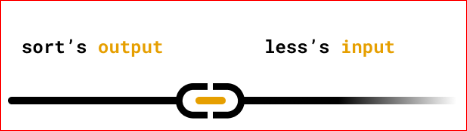

Before we begin, let's learn about the built-in echo command. We use this command to print to screen whatever we pass to it as an argument; it's analogous to the print function in Python.

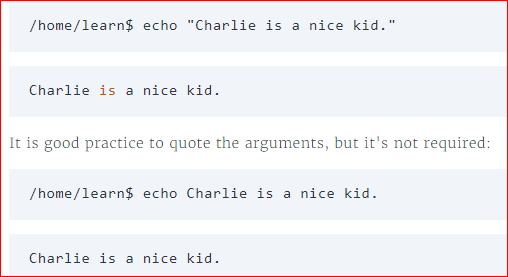

There is another built-in that is used to print to screen: printf (print formatted). This command is more powerful than echo and is implemented in many programming languages, including Python (by means of string formatting). 

We are able to print to screen with echo, but what if we want to save the output to a file? We can do this with the redirection operator >. The syntax looks like command >filename.

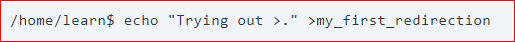

Let's now save another line to this file:
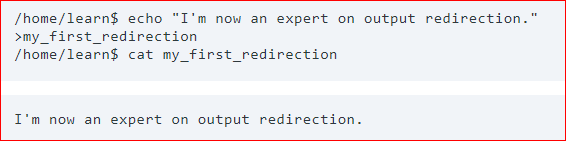

And we see that the file includes our latest addition, but the line we added before disappeared! The redirection operator > will:

* Empty the contents of the target file when it is invoked, if the file exists.
* If it doesn't exist, it will create it.

A corollary of what we saw above is that we can redirect the screen output of all commands we've learned so far to files, including cat, sort, grep, less, to name a few.

We ran cat east west, which displayed on the screen the contents of both files (east and west) in order. With the redirection operator, we're able to create a new file with exactly these contents.

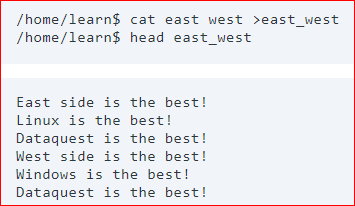

And we see that we created a file east_west — its contents are those of concatenating east and west.

In the last file, we were also tasked with using grep to print to screen any lines of any file in the directory rg_data that have fields starting with the word math, while ignoring case. 

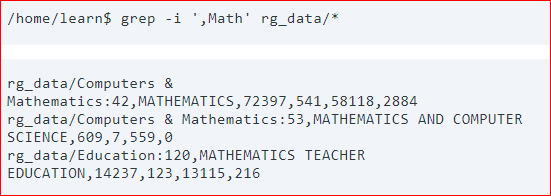

Notice how the first few characters of each line are the filename of the file that contained the corresponding matched line.

In the following exercise, we'll create a file with this content without the filenames. To do this, we'll use the -h option in grep, which allows us to exclude the filenames from the output. Here is the relevant portion of the documentation:

* -h, --no-filename
       Suppress  the  prefixing  of  file names on output. This is the default when there is only one file (or only standard input) to search.
       
Questions:

1. Use grep to create a file called math_data with contents that are any lines of any file in the directory rg_data that have fields starting with the word math, while ignoring case and excluding the filenames.
2. Create a file named echo_help with contents that are the help page of the built-in command echo.

Asnwers:
1. grep -hi ',Math' rg_data/* > rg_data/math_data
2. help echo > echo_help


To append output to a file through redirection, we can use the >> operator.

The usage of this operator is exactly the same as with >, only >> is used. The difference occurs in how they behave. Whereas > always creates a new file, >> appends to the target file, if the target file exists, otherwise it creates a new file.

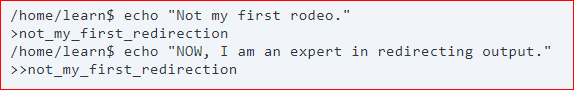

# Word of caution regarding output redirection.

The following is an excerpt from the previously mentioned book "The Linux Command Line".

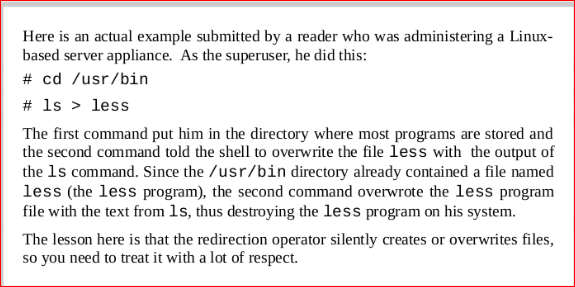

Question:

1. Append the first row of any of the files in rg_data to a new file called math_dataset in your home directory.
2. Append the output of grep -hi ',Math' /home/dq/rg_data/* to that file.

Answer:

1. head -n 1 /home/dq/rg_data/Computers\ \&\ Mathematics >>math_dataset
2. grep -hi ',Math' /home/dq/rg_data/* >>math_dataset

There are times when, for various reasons, we'll want to create empty text files. A common reason is that only the existence of the file matters, regardless of its contents.

As an example, if we want to create a Python package (a collection of Python modules), in order to be able to import them, files called `__init__.py` "are required to make Python treat directories containing the file as packages. (...). In the simplest case, `__init__.py` can just be an empty file", ([from the Python documentation on packages](https://docs.python.org/3/tutorial/modules.html#packages)).

We can use the redirection operator to create empty text files, but it's not as simple as it might look at first glance. Let's see this. A natural common first try at creating an empty file is by echoing "nothing" into a file.

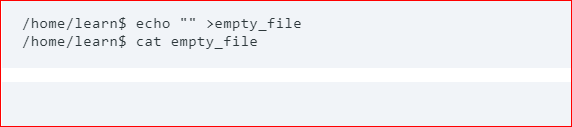

It seems like the file isn't actually empty, but rather it has a blank line. Let's confirm this by passing this file as an argument to wc.

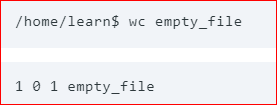

This tells us that this file has one line, confirming our suspicion. Having one line means that there is an occurrence of the \n character — this character is responsible for the one byte that this file occupies.

Since this file was created with echo, it is reasonable to investigate this command further. Running help echo gives us a clue:

* Display the ARGs, separated by a single space character and followed by a newline, on the standard output.

* Options:
 * -n    do not append a newline

So we see that echo, by default, appends a newline character at the end, and that the -n option prevents this from happening. All this finally leads us to a solution of creating a new empty file:

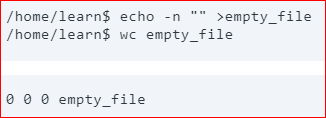

We accomplished our goal, but this solution is a bit convoluted. As usual, the shell provides us with alternatives. One of them is to redirect nothing into a file:
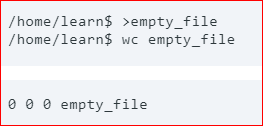

This, although much nicer, doesn't allow us to create more than one empty file at a time. However, the touch command does!

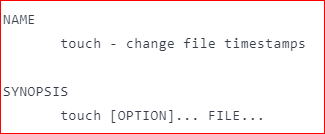

The touch command receives filenames as input. We see from the ellipsis next to the filename argument that we can create more than one empty file at the same time using touch. If the files exist, it will alter their last modification time, otherwise it will create empty files with the arguments' name.

Question:
    
* Create two empty files in your home directory.

Answer:

touch file1 file2

Now that we've learned how to save output into files, we can use these files to build upon work previously done.

We used cut to select the second and fifth columns of the data set by running cut -d"," -f2,5 example_data.csv. Let's save this output to a file 

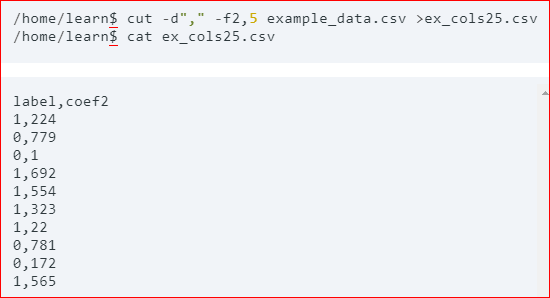

We can now use grep on this file to filter for the rows with a label of 0.

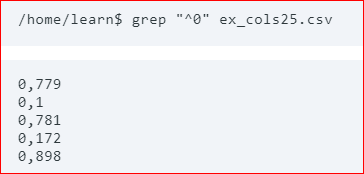

In order to obtain this output we:

* Used cut to select columns.
 * Redirected the output into ex_cols25.csv.
* Used grep on ex_cols25.csv.

It required two commands and accessing the hard drive for reading and writing. This can be very inefficient when working with large datasets.

Disk space in the old days was a big issue and this process that we just described wasn't always an option, so [Ken Thompson](https://en.wikipedia.org/wiki/Ken_Thompson) implemented a solution: cut off the intermediate step of writing to a file and connect the output of a command to the input of another command.

The mechanism that does this is called a **pipeline**.

# Pipeline

We can connect the output of command1 to the input of command2 by running command1 | command2. The vertical bar (|) is called a [pipe](https://en.wikipedia.org/wiki/Vertical_bar#Pipe) and it is responsible for "piping" the output of the first command into the input of the second command.

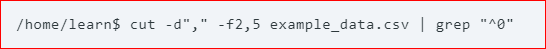

The command cut -d"," -f2,5 example_data.csv (which stands in for command1) produces output which is passed to the input of grep "^0" (which stands in for command2). This is not only easier to execute, it is more efficient!

We mentioned that the directory /bin contains files that are essential for the system to run, and there are a lot of them. We can use less to browse the output of listing the files in /bin. We show this in the gif below:

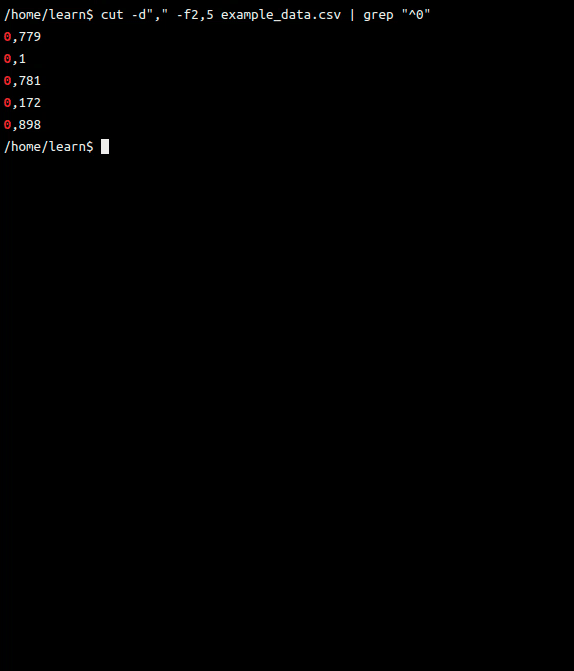

In [2]:
Image("pipe_less.gif")

Question:
    
Print to screen the lines of the output of zen that contain the word better.

Answer:

zen | grep "better"

or 

grep "better" zen | less


An additional feature of the shell is that it allows us to use as many pipes as we want, making it easy to combine the capabilities of several programs. This feature is at the core of the [Unix philosophy](https://en.wikipedia.org/wiki/Unix_philosophy)

Some of the benefits of this are:

* Makes it unnecessary to write big programs that accomplish only one goal, by virtue of the fruitfulness of combining already existing commands.
* It empowers the users to create more complex commands by virtue of the existing programs.
* The smaller programs are actually useful on their own, and not just as part of a whole.

Above, we looked at the contents of /bin by piping **ls** into **less**. There are quite a lot of files in this directory. But how many? And how many of these are directories? Let's investigate.

To count the number of files we'll pass the output of ls -l /bin to wc -l (the -l option of wc outputs only the number of lines). Since we'll need to exclude the first row (which shows the size of /bin), we'll pipe the output of ls -l /bin to tail -n+2 (this will print all the rows starting from the second one) and then pipe this output to wc -l.

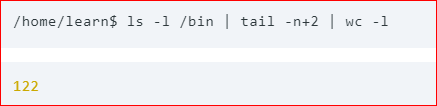

And we see that we can have more than two commands in a pipeline. Let's now count the number of directories.

We recall that lines corresponding to directories start with d. We can use this information together with grep to obtain the desired result.

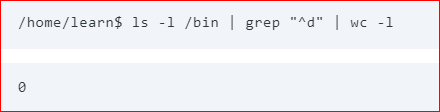

None of the files is a directory.

Question:

* Recall that the -u option of sort removes duplicates. 
    * Print to screen the number of lines of all the files in rg_data, excluding duplicates.
    
Answer:

cd ~/rg_data
sort -u * | wc -l 

or 

sort -u rg_data/ | wc -l

In the example below we'll be running a command that outputs an error message. We could use any command that outputs an error message. We'll go with rm /dev/null.

Also known as the null device, /dev/null is a [special file](https://en.wikipedia.org/wiki/Device_file#Character_devices) used to discard data. Any data redirected to this file will be ignored by the operating system and simply disappear.

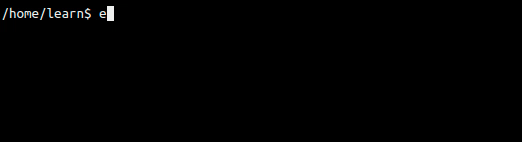

In [3]:
Image("dev_null.gif")

This is useful when a command performs an action and outputs something, but we just care about the action.

Due to permissions, we are unable to delete this file. Therefore, trying to remove it will result in an error message.

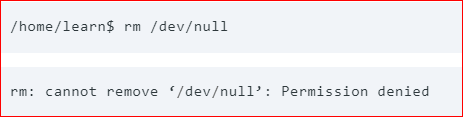

We couldn't remove /dev/null and we got an error message. Let's redirect the output of running this command to a file named err.

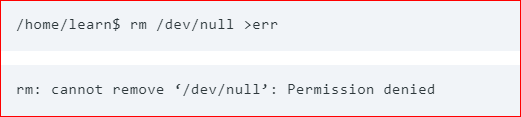

This is surprising, even though we redirected the output, it still showed in our screen. Let's see the contents of err.

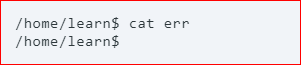

It is empty. In order to understand what happened here, we need to introduce a few concepts, which we'll do in the next file.

Question:

* echo something into /dev/null.

Answer:

* echo "This is just going to disappear." >/dev/null